# Regular Genomics Project **RNA Localisation**


In [5]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [6]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [9]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att13'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

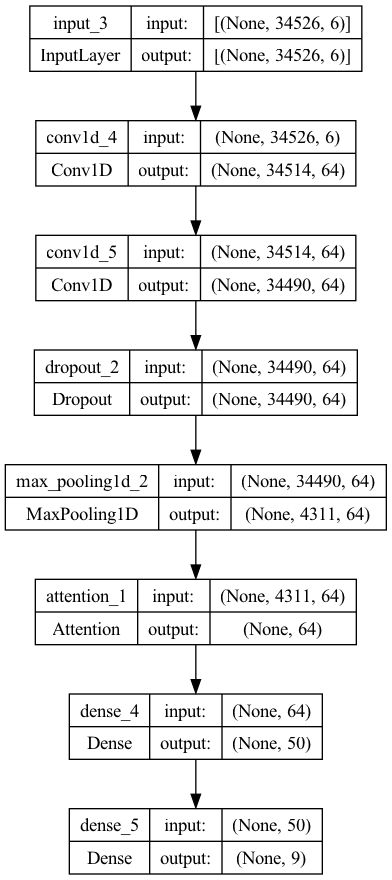

In [10]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 34526, 6)]        0         
                                                                 
 conv1d_4 (Conv1D)           (None, 34514, 64)         2688      
                                                                 
 conv1d_5 (Conv1D)           (None, 34490, 64)         28672     
                                                                 
 dropout_2 (Dropout)         (None, 34490, 64)         0         
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 4311, 64)          0         
 g1D)                                                            
                                                                 
 attention_1 (Attention)     (None, 64)                7920      
                                                             

In [12]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/10
311/311 [==============================] - 366s 1s/step - loss: 7.2400 - ERM: -0.0360 - KDEL: -0.0012 - LMA: -0.0197 - MITO: 0.0622 - NES: -0.0294 - NIK: -0.0388 - NLS: -0.0321 - NUCP: -0.0869 - OMM: -0.0174 - val_loss: 2.7229 - val_ERM: -0.1643 - val_KDEL: 0.4518 - val_LMA: 0.2138 - val_MITO: -0.1361 - val_NES: 0.1025 - val_NIK: -0.2615 - val_NLS: 0.3184 - val_NUCP: 0.3758 - val_OMM: 0.5505
Epoch 2/10
311/311 [==============================] - 359s 1s/step - loss: 2.6241 - ERM: -0.1181 - KDEL: -0.2067 - LMA: -0.0383 - MITO: 0.0134 - NES: 0.0339 - NIK: -0.1138 - NLS: -0.0715 - NUCP: -0.0974 - OMM: -0.0259 - val_loss: 2.3026 - val_ERM: -0.0197 - val_KDEL: 0.1619 - val_LMA: 0.2451 - val_MITO: -0.0619 - val_NES: -0.0846 - val_NIK: -0.1984 - val_NLS: 0.2643 - val_NUCP: 0.2860 - val_OMM: 0.4851
Epoch 3/10
311/311 [==============================] - 364s 1s/step - loss: 2.2900 - ERM: -0.0883 - KDEL: -0.2332 - LMA: -0.0264 - MITO: -0.0356 - NES: -0.0165 - NIK: -0.1273 - NLS: -0.0706

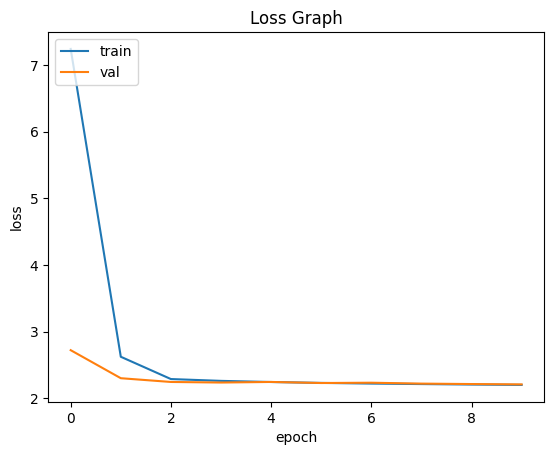

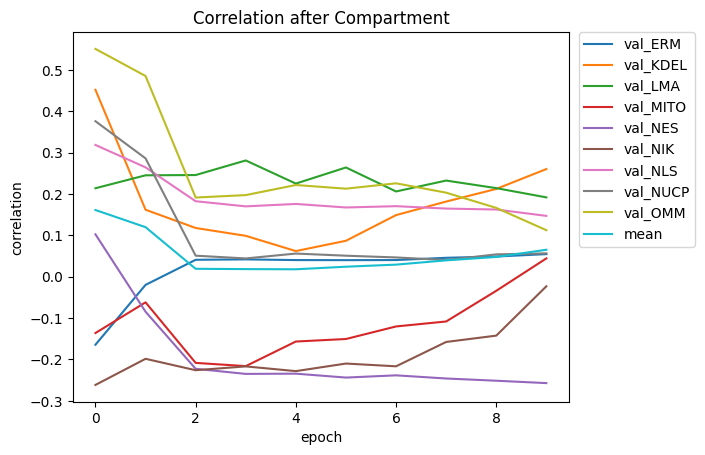

In [13]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

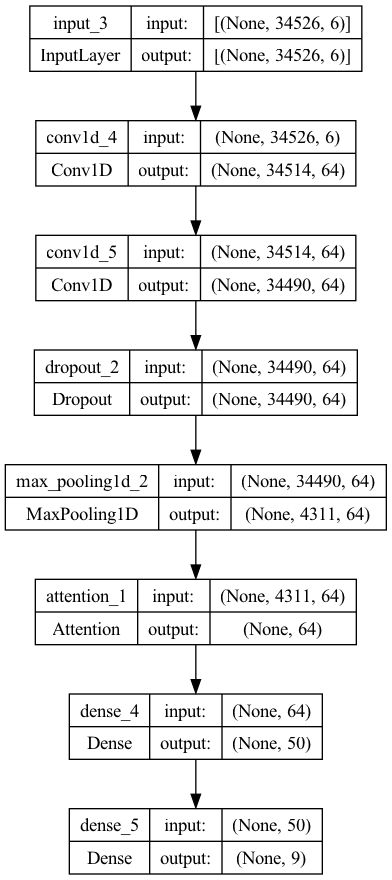

In [14]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)